In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("../../datasets/toxic_comments_2.csv",nrows=6000)
labels = pd.read_csv("../../datasets/labels.csv",nrows=6000)

In [5]:
import nltk
from nltk.corpus import stopwords
labels = labels[["id","toxic"]]
labels["toxic"] = labels["toxic"].replace(-1,1)

In [8]:
import re
corpus = []
dataset["comment_text"] = dataset["comment_text"].str.replace("\n"," ")
dataset["comment_text"] = dataset["comment_text"].str.replace("@"," ")
dataset["comment_text"] = dataset["comment_text"].str.replace("=="," ")
dataset["comment_text"] = dataset["comment_text"].str.replace("*"," ")
for i in range(0,6000):
    words = re.sub('[^a-zA-Z]',' ',dataset["comment_text"][i])
    words = words.lower().split()
    words = [word for word in words if not word in set(stopwords.words("english"))]
    sentence = ' '.join(words)
    corpus.append(sentence)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)

X = cv.fit_transform(corpus).toarray()
y = labels["toxic"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
model = Sequential()
model.add(Dense(10,input_shape=(1500,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Dense(1,activation='sigmoid'))

In [17]:
#functions to calculate recall,precision and f1_score
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',f1_m,precision_m, recall_m])

In [18]:
history = model.fit(X_train,y_train,batch_size=45,epochs=8,verbose=2)

Train on 4800 samples
Epoch 1/8
4800/4800 - 3s - loss: 0.6685 - accuracy: 0.6117 - f1_m: 0.7485 - precision_m: 0.6220 - recall_m: 0.9491
Epoch 2/8
4800/4800 - 1s - loss: 0.6321 - accuracy: 0.6377 - f1_m: 0.7695 - precision_m: 0.6342 - recall_m: 0.9857
Epoch 3/8
4800/4800 - 1s - loss: 0.5832 - accuracy: 0.6671 - f1_m: 0.7806 - precision_m: 0.6577 - recall_m: 0.9672
Epoch 4/8
4800/4800 - 1s - loss: 0.5375 - accuracy: 0.7123 - f1_m: 0.7989 - precision_m: 0.7003 - recall_m: 0.9372
Epoch 5/8
4800/4800 - 1s - loss: 0.4948 - accuracy: 0.7540 - f1_m: 0.8202 - precision_m: 0.7454 - recall_m: 0.9159
Epoch 6/8
4800/4800 - 1s - loss: 0.4607 - accuracy: 0.7748 - f1_m: 0.8291 - precision_m: 0.7703 - recall_m: 0.9037
Epoch 7/8
4800/4800 - 0s - loss: 0.4221 - accuracy: 0.8092 - f1_m: 0.8522 - precision_m: 0.8130 - recall_m: 0.9008
Epoch 8/8
4800/4800 - 1s - loss: 0.3934 - accuracy: 0.8221 - f1_m: 0.8606 - precision_m: 0.8297 - recall_m: 0.8982


In [19]:
y_pred = model.predict(X_test)

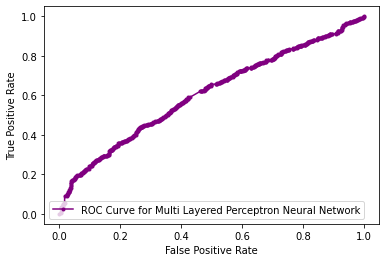

In [23]:
from sklearn.metrics import roc_curve
fp,tp,treshold = roc_curve(y_test,y_pred) #using percentages for a roc curve makes the roc curve curved
plt.plot(fp,tp,marker = '.',label='ROC Curve for Multi Layered Perceptron Neural Network',color='purple')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [24]:
#using 0 or 1 will make the curve linear